In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Spatial Aggregration

In [32]:
#1
df = pd.read_csv("/content/Data.csv")
dfm = df.copy()

state_avg_pm25 = df.groupby('state')['PM2.5'].mean()

most_polluted_state = state_avg_pm25.idxmax()
most_polluted_avg = state_avg_pm25.max()

print(f"State with the highest average PM2.5 concentration: {most_polluted_state} (Avg PM2.5: {most_polluted_avg:.2f} µg/m³)")


State with the highest average PM2.5 concentration: Delhi (Avg PM2.5: 104.10 µg/m³)


In [ ]:
#2
df100=df.copy()
df100['Timestamp'] = pd.to_datetime(df100['Timestamp'], errors='coerce')

df_2023 = df100[df100['Timestamp'].dt.year == 2023].copy()

df_2023['Date'] = df_2023['Timestamp'].dt.date
hazardous_days_per_state = df_2023[df_2023['PM2.5'] > 300].groupby('state')['Date'].nunique()

most_hazardous_state = hazardous_days_per_state.idxmax()
most_hazardous_days = hazardous_days_per_state.max()


print(f"State with the most hazardous PM2.5 days in 2023: {most_hazardous_state} ({most_hazardous_days} days)")





State with the most hazardous PM2.5 days in 2023: Delhi (49 days)


In [ ]:
#3
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df_2023 = df[df['Timestamp'].dt.year == 2023].copy()

state_variability = df_2023.groupby('state')['PM2.5'].std()

most_variable_state = state_variability.idxmax()
highest_variability = state_variability.max()


print(f"State with the highest PM2.5 variability in 2023: {most_variable_state} (Std Dev: {highest_variability:.2f})")


State with the highest PM2.5 variability in 2023: Delhi (Std Dev: 82.80)


In [ ]:
#4
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df_covid = df[df['Timestamp'].dt.year.isin([2020, 2021])].copy()

state_avg_pm25 = df_covid.groupby('state')['PM2.5'].mean()


least_polluted_state = state_avg_pm25.idxmin()
lowest_avg_pm25 = state_avg_pm25.min()

print(f"State with the lowest average PM2.5 levels during Covid period (2020-2021): {least_polluted_state} (Avg PM2.5: {lowest_avg_pm25:.2f} µg/m³)")



State with the lowest average PM2.5 levels during Covid period (2020-2021): Mizoram (Avg PM2.5: 14.32 µg/m³)


Spatio-temporal aggregation

In [ ]:
#1

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df_2022 = df[df['Timestamp'].dt.year == 2022].copy()

df_2022['Month'] = df_2022['Timestamp'].dt.month
summer_data = df_2022[df_2022['Month'].isin([3, 4, 5])]
monsoon_data = df_2022[df_2022['Month'].isin([6, 7, 8, 9])]


summer_avg = summer_data.groupby('state')['PM2.5'].mean()
monsoon_avg = monsoon_data.groupby('state')['PM2.5'].mean()

pm25_change = ((monsoon_avg - summer_avg) / summer_avg) * 100


most_difference_state = pm25_change.abs().idxmax()
most_difference_value = pm25_change[most_difference_state]

print("Percentage change in PM2.5 levels for each state:",pm25_change)
print(f"\nState with the most significant difference: {most_difference_state} ({most_difference_value:.2f}% change)")


Percentage change in PM2.5 levels for each state: state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.964699
West Bengal   

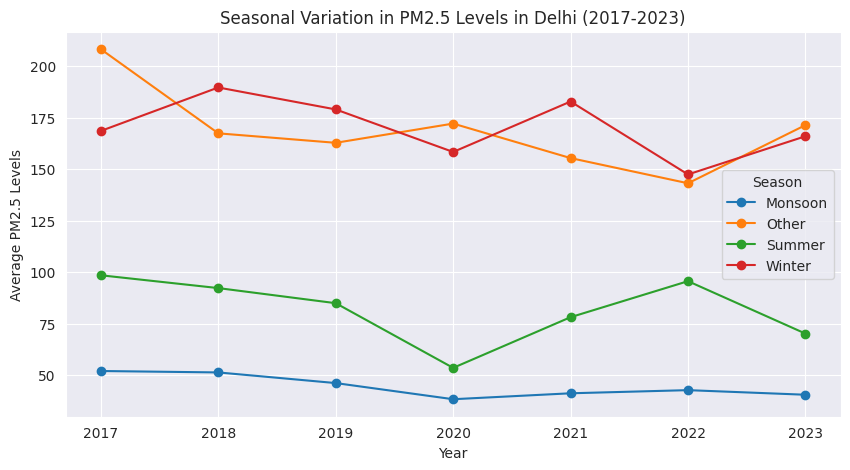


The polution during WINTER is always higher than that of SUMMER and MONSOON


In [41]:
#2
df1 = dfm.copy()
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], errors='coerce')
df1['Year'] = df1['Timestamp'].dt.year
df1['Month'] = df1['Timestamp'].dt.month


delhi_data = df1[(df1['state'] == 'Delhi') & (df1['Year'].between(2017, 2023))].copy()

season_mapping = {
    'Winter': [12, 1, 2],
    'Summer': [3, 4, 5],
    'Monsoon': [6, 7, 8, 9]
}

def assign_season(month):
    for season, months in season_mapping.items():
        if month in months:
            return season
    return 'Other'

delhi_data['Season'] = delhi_data['Month'].apply(assign_season)


seasonal_avg = delhi_data.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()



seasonal_avg.plot(kind='line', marker='o', figsize=(10, 5))
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Seasonal Variation in PM2.5 Levels in Delhi (2017-2023)")
plt.legend(title="Season")
plt.grid(True)
plt.show()

print("\nThe polution during WINTER is always higher than that of SUMMER and MONSOON")


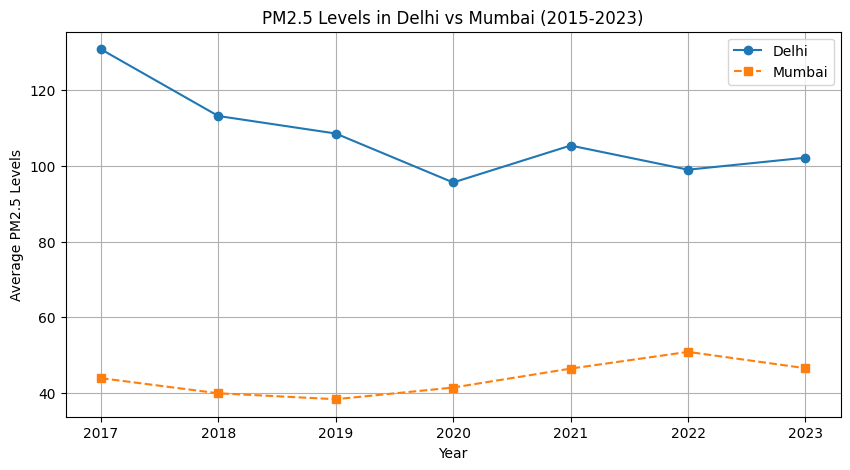


DELHI had more fluctuations that MUMBAI


In [33]:
#3

df2 = df.copy()
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], errors='coerce')

df2['Year'] = df2['Timestamp'].dt.year
city_data = df2[(df2['state'].isin(['Delhi', 'Maharashtra'])) & (df2['Year'].between(2017, 2023))]

city_avg = city_data.groupby(['Year', 'state'])['PM2.5'].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(city_avg.index, city_avg['Delhi'], marker='o', label='Delhi', linestyle='-')
plt.plot(city_avg.index, city_avg['Maharashtra'], marker='s', label='Mumbai', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("PM2.5 Levels in Delhi vs Mumbai (2015-2023)")
plt.legend()
plt.grid(True)
plt.show()

print("\nDELHI had more fluctuations that MUMBAI")

Funding Based


In [43]:
# Funding based Q1
import pandas as pd

df_funding = pd.read_csv("NCAP_Funding.csv")

df_funding["Amount released during FY 2021-22"] = pd.to_numeric(
    df_funding["Amount released during FY 2021-22"].replace('-', '0'),
    errors='coerce')

state_funding = df_funding.groupby("State", as_index=False)["Amount released during FY 2021-22"].sum()

# flag for confirming funding
state_funding["Received_Funding"] = state_funding["Amount released during FY 2021-22"] > 0

df_pm25 = pd.read_csv("Data.csv")
df_pm25.rename(columns={'state': 'State'}, inplace=True)


df_pm25_2021 = df_pm25[df_pm25["Timestamp"].str.startswith("2021")]


df_merged = pd.merge(df_pm25_2021, state_funding, on="State", how="left")


df_merged["Received_Funding"] = df_merged["Received_Funding"].fillna(False)


pm25_funded = df_merged[df_merged["Received_Funding"] == True]["PM2.5"]
pm25_not_funded = df_merged[df_merged["Received_Funding"] == False]["PM2.5"]

mean_funded = pm25_funded.mean()
mean_not_funded = pm25_not_funded.mean()

print(f"\nAverage PM2.5 in 2021 for States with NCAP Funding: {mean_funded:.2f} µg/m³")
print(f"Average PM2.5 in 2021 for States without NCAP Funding: {mean_not_funded:.2f} µg/m³")



Average PM2.5 in 2021 for States with NCAP Funding: 65.35 µg/m³
Average PM2.5 in 2021 for States without NCAP Funding: 55.35 µg/m³


<ipython-input-43-f668e52eda9a>:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged["Received_Funding"] = df_merged["Received_Funding"].fillna(False)


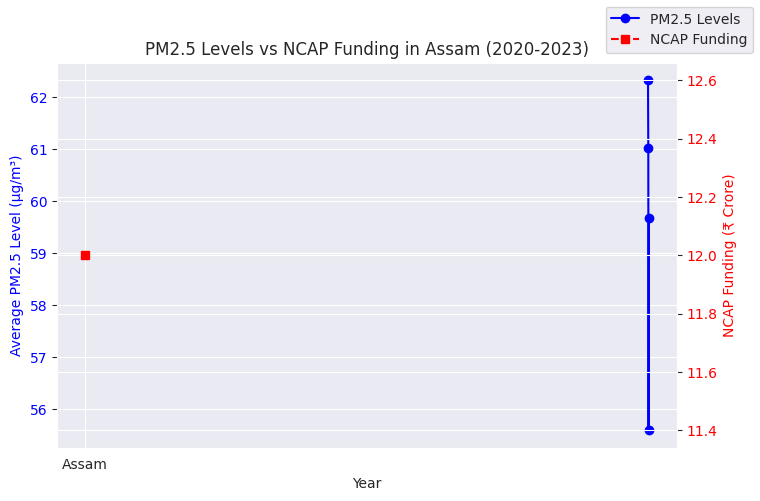

No clear trend of improvement is observed. Other factors may be influencing air quality in Assam.


In [44]:
# Funding based Q2


ncap_funding = pd.read_csv("/content/NCAP_Funding.csv")


ncap_funding["Amount released during FY 2020-21"] = pd.to_numeric(
    ncap_funding["Amount released during FY 2020-21"], errors="coerce"
)
ncap_funding["Total fund released"] = pd.to_numeric(
    ncap_funding["Total fund released"], errors="coerce"
)


assam_funding = ncap_funding[ncap_funding["State"] == "Assam"]
yearly_funding = assam_funding.groupby("State")["Amount released during FY 2020-21"].sum()


df3 = dfm.copy()


df3["Timestamp"] = pd.to_datetime(df3["Timestamp"], errors="coerce")


assam_df3 = df3[df3["state"] == "Assam"].copy()

assam_df3["Year"] = assam_df3["Timestamp"].dt.year

assam_df3_filtered = assam_df3[assam_df3["Year"].between(2020, 2023)]

yearly_pm25 = assam_df3_filtered.groupby("Year")["PM2.5"].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_xlabel("Year")
ax1.set_ylabel("Average PM2.5 Level (µg/m³)", color='b')
ax1.plot(yearly_pm25.index, yearly_pm25.values, marker='o', linestyle='-', color='b', label='PM2.5 Levels')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

twin_ax = ax1.twinx()
twin_ax.set_ylabel("NCAP Funding (₹ Crore)", color='r')
twin_ax.plot(yearly_funding.index, yearly_funding.values, marker='s', linestyle='--', color='r', label='NCAP Funding')
twin_ax.tick_params(axis='y', labelcolor='r')

plt.title("PM2.5 Levels vs NCAP Funding in Assam (2020-2023)")
fig.legend(loc="upper right")
plt.show()


print("No clear trend of improvement is observed. Other factors may be influencing air quality in Assam.")

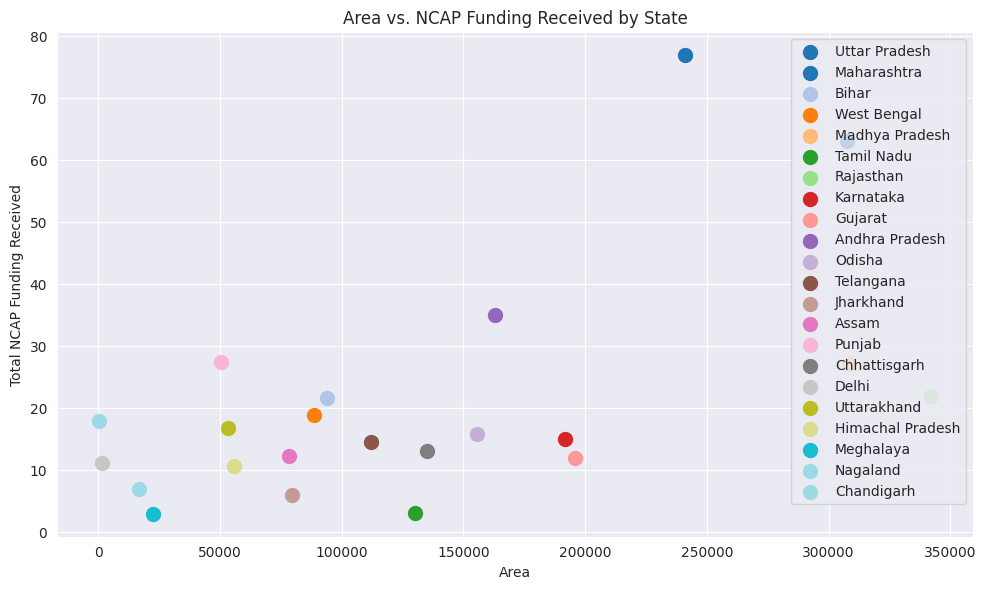

In [45]:
#Funding Based Q3
import matplotlib.pyplot as plt
df_funding = pd.read_csv("NCAP_Funding.csv")


funding_by_state = df_funding.groupby("State", as_index=False)["Total fund released"].sum()
funding_by_state.rename(columns={"Total fund released": "Funding"}, inplace=True)




df_state = pd.read_csv("State_data.csv")



df_merged = pd.merge(df_state, funding_by_state, on="State", how="inner")




plt.figure(figsize=(10, 6))


states = df_merged["State"].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(states)))


state_color = {state: color for state, color in zip(states, colors)}


for idx, row in df_merged.iterrows():
    state = row["State"]
    area = row["Area (km2)"]
    funding = row["Funding"]
    plt.scatter(area, funding, color=state_color[state], s=100, label=state)

plt.xlabel("Area")
plt.ylabel("Total NCAP Funding Received")
plt.title("Area vs. NCAP Funding Received by State")

plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


Temporal Aggregation


In [28]:
#1
df6 = df[df["Timestamp"].str.startswith("2020-08")].copy()
df6 = df6.groupby("station")["PM2.5"].max()


df6 = df6.reset_index()
max_argument = df6["PM2.5"].argmax()

print(df6.iloc[max_argument])


station    Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
PM2.5                                             805.51
Name: 245, dtype: object


In [27]:
#2
df7 = dfm[dfm["Timestamp"].str.startswith("2018")].copy()
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8,9]:
        return "Monsoon"
    else:
      return "Other"

df7["Timestamp"] = pd.to_datetime(df7["Timestamp"])
df7['season'] = df7['Timestamp'].dt.month.map(get_season)

df7 = df7.groupby("season")["PM2.5"].mean()

df7 = df7.reset_index()
max_argument = df7["PM2.5"].argmax()

print(df7.iloc[max_argument])



season        Winter
PM2.5     127.002191
Name: 3, dtype: object


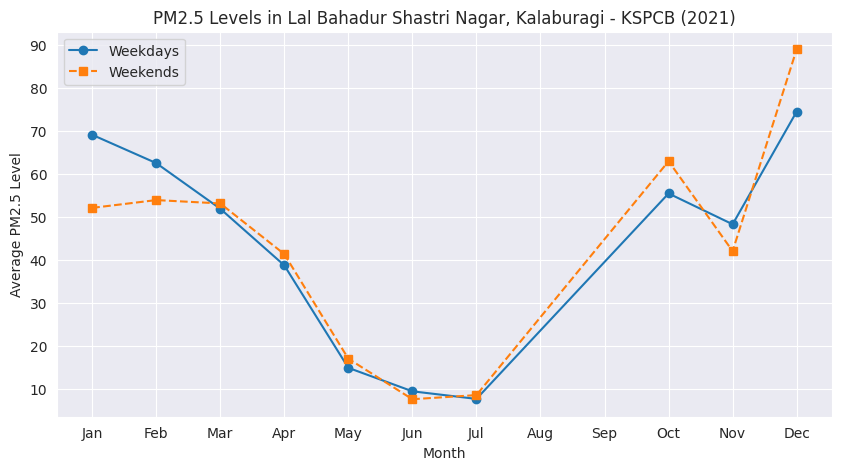

The variations across months may indicate seasonal trends or activity differences


In [59]:
#3
import pandas as pd
import matplotlib.pyplot as plt

df8 = dfm.copy()

df8['Timestamp'] = pd.to_datetime(df8['Timestamp'], errors='coerce')


station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_filtered = df8[(df8['station'] == station_name) & (df8['Timestamp'].dt.year == 2021)]


df_filtered = df_filtered.dropna(subset=['PM2.5'])
df_filtered['Month'] = df_filtered['Timestamp'].dt.month
df_filtered['DayOfWeek'] = df_filtered['Timestamp'].dt.weekday


df_filtered['Weekend'] = df_filtered['DayOfWeek'] >= 5


monthly_avg = df_filtered.groupby(['Month', 'Weekend'])['PM2.5'].mean().unstack()


plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg[False], marker='o', linestyle='-', label='Weekdays')
plt.plot(monthly_avg.index, monthly_avg[True], marker='s', linestyle='--', label='Weekends')

plt.xlabel('Month')
plt.ylabel('Average PM2.5 Level')
plt.title(f'PM2.5 Levels in {station_name} (2021)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend()
plt.grid(True)
plt.show()

#observations:


print("The variations across months may indicate seasonal trends or activity differences")





Population Based

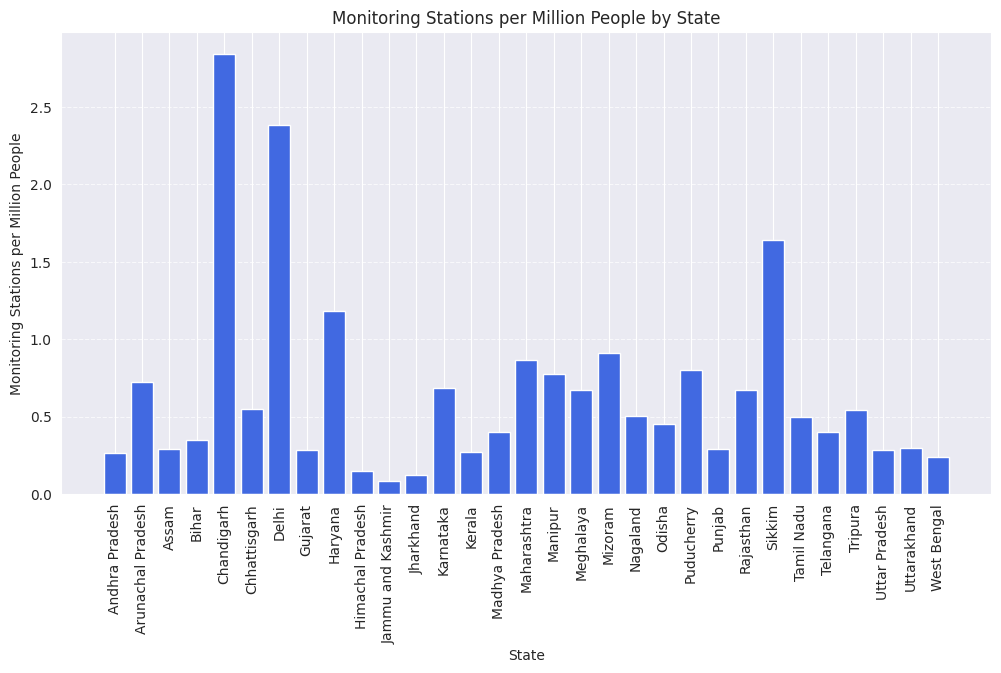

State with highest monitoring station density relative to population: State                   Chandigarh
Stations per Million       2.84239
Name: 4, dtype: object


In [46]:
#Population Based Q1

import pandas as pd
import matplotlib.pyplot as plt

df13 = dfm.copy()
df_states = pd.read_csv("State_data.csv")

df_stations = df.groupby('state')['station'].nunique().reset_index()
df_stations.columns = ['State', 'Total Stations']

df_stations = df_stations.merge(df_states[['State', 'Population']], on='State', how='inner')

df_stations['Stations per Million'] = (df_stations['Total Stations'] / df_stations['Population']) * 1_000_000

max_station_state = df_stations.loc[df_stations['Stations per Million'].idxmax()]

plt.figure(figsize=(12, 6))
plt.bar(df_stations['State'], df_stations['Stations per Million'], color='royalblue')

plt.xlabel('State')
plt.ylabel('Monitoring Stations per Million People')
plt.title('Monitoring Stations per Million People by State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("State with highest monitoring station density relative to population:",
      max_station_state[['State', 'Stations per Million']])


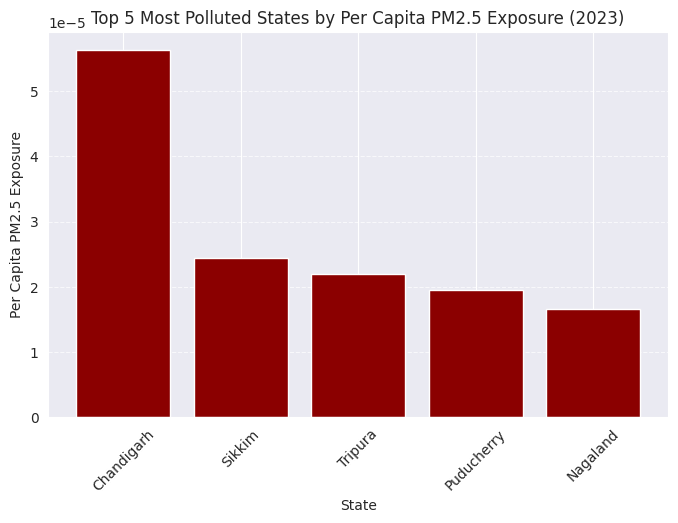

         State  Per Capita PM2.5
4   Chandigarh          0.000056
24      Sikkim          0.000024
27     Tripura          0.000022
21  Puducherry          0.000019
19    Nagaland          0.000017


In [47]:
#Population Based 2
import pandas as pd
import matplotlib.pyplot as plt

df15 = dfm.copy()

df_2023 = df[df['Timestamp'].str.startswith('2023')]

df_pm25 = df_2023.groupby('state')['PM2.5'].mean().reset_index()
df_pm25.columns = ['State', 'Avg PM2.5']

df_pm25 = df_pm25.merge(df_states[['State', 'Population']], on='State', how='inner')

df_pm25['Per Capita PM2.5'] = df_pm25['Avg PM2.5'] / df_pm25['Population']

top_5_polluted = df_pm25.nlargest(5, 'Per Capita PM2.5')

plt.figure(figsize=(8, 5))
plt.bar(top_5_polluted['State'], top_5_polluted['Per Capita PM2.5'], color='darkred')

plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States by Per Capita PM2.5 Exposure (2023)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(top_5_polluted[['State', 'Per Capita PM2.5']])


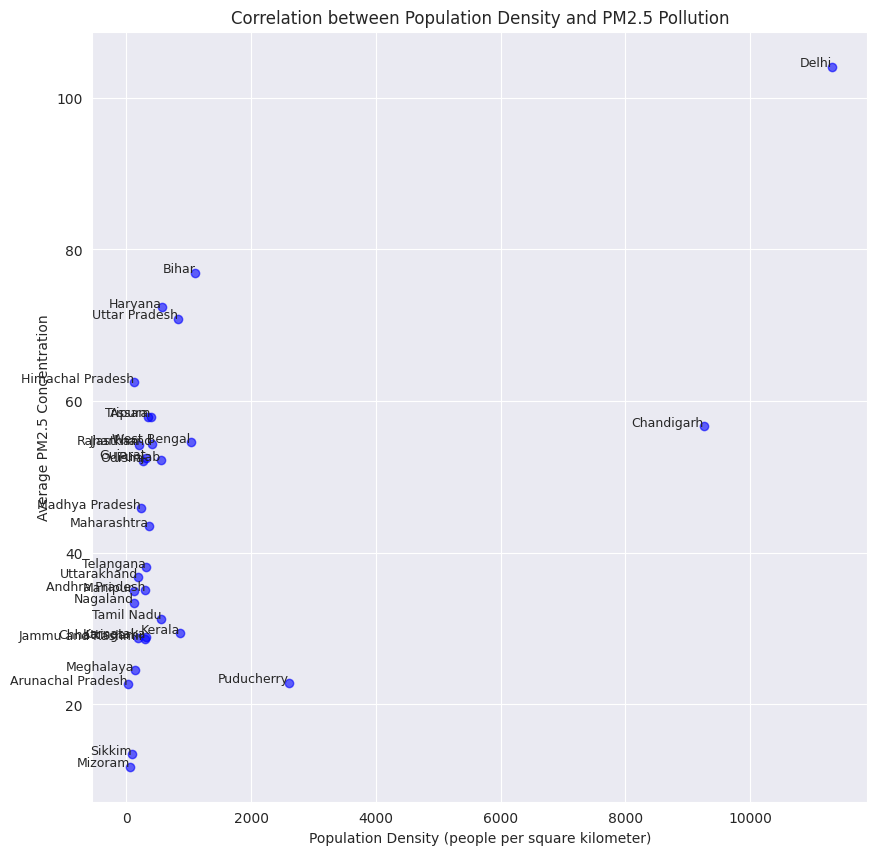

In [57]:
#Population Based Q3
data = dfm.copy()
state_data = df_states.copy()




state_data['Population Density'] = state_data['Population'] / state_data['Area (km2)']


data_avg_pm25 = data.groupby('state')['PM2.5'].mean().reset_index()
data_avg_pm25.columns = ['state', 'Average PM2.5']


merged_data = pd.merge(state_data, data_avg_pm25, left_on='State', right_on='state', how='inner')


plt.figure(figsize=(10, 10))
plt.scatter(merged_data['Population Density'], merged_data['Average PM2.5'], color='blue', alpha=0.6)


for i, row in merged_data.iterrows():
    plt.text(row['Population Density'], row['Average PM2.5'], row['State'], fontsize=9, ha='right')

plt.xlabel("Population Density (people per square kilometer)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Correlation between Population Density and PM2.5 Pollution")
plt.grid(True)
plt.show()


Area Based


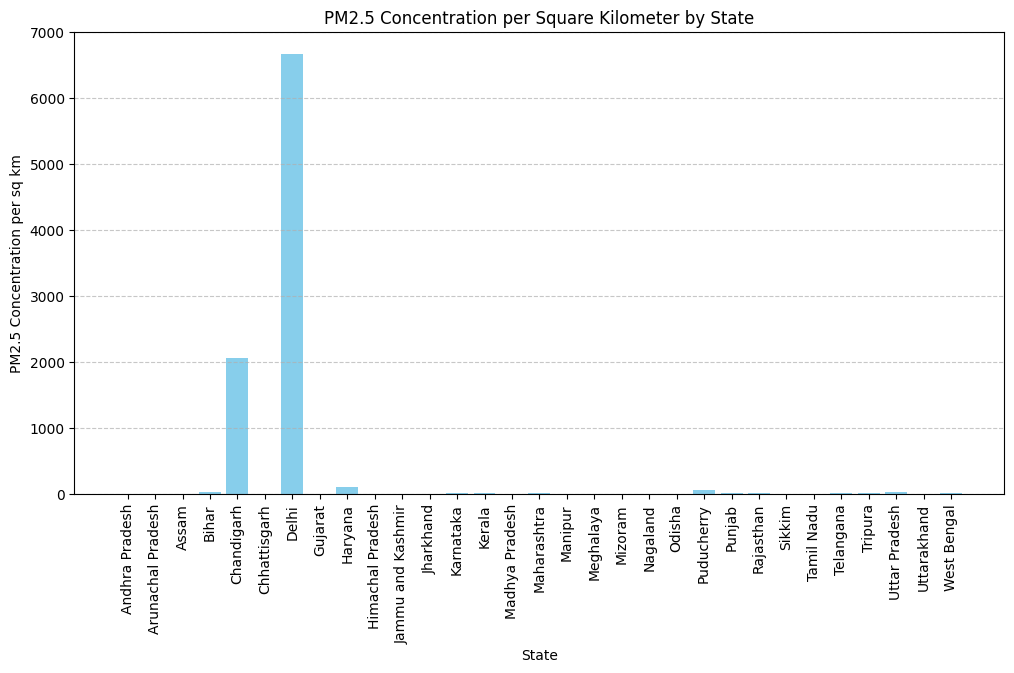

State with highest PM2.5 per sq km: state                  Delhi
PM2.5 per km2    6673.121359
Name: 6, dtype: object


In [ ]:
#1
import pandas as pd
import matplotlib.pyplot as plt

df9 = dfm.copy()
df_state = pd.read_csv("State_data.csv")


dfbystate = df9.groupby('state')['PM2.5'].sum().reset_index()


dfbystate = dfbystate.merge(df_state, left_on='state', right_on='State', how='inner')
dfbystate['PM2.5 per km2'] = dfbystate['PM2.5'] / dfbystate['Area (km2)']


max_state = dfbystate.loc[dfbystate['PM2.5 per km2'].idxmax()]


plt.figure(figsize=(12, 6))
plt.bar(dfbystate['state'], dfbystate['PM2.5 per km2'], color='skyblue')

plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per sq km')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("State with highest PM2.5 per sq km:", max_state[['state', 'PM2.5 per km2']])


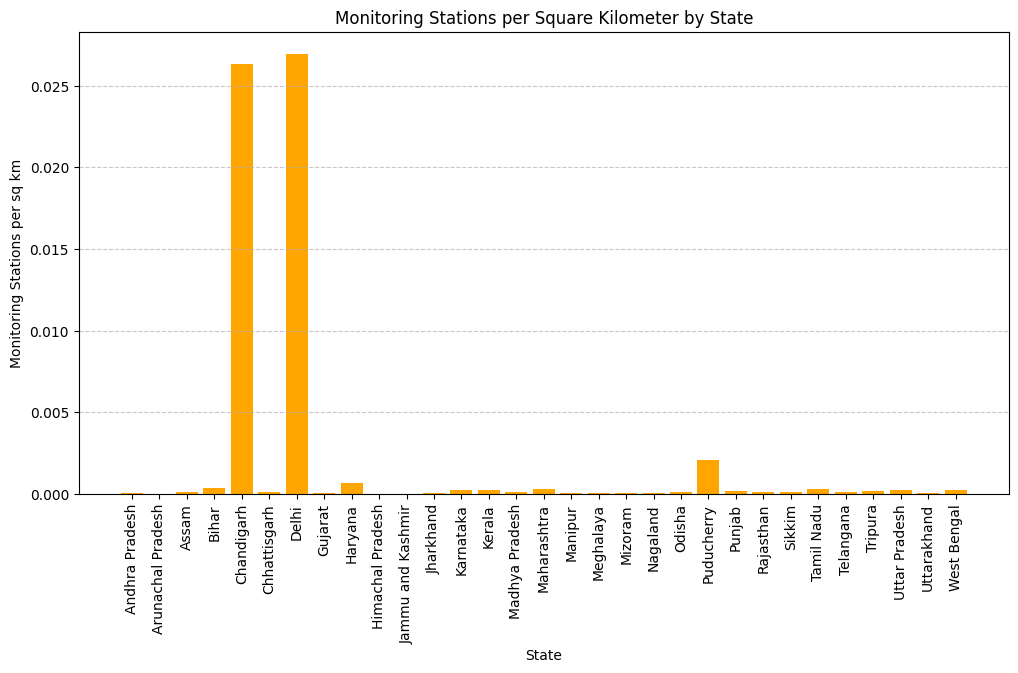

State with highest monitoring station density: state                  Delhi
Stations per km2    0.026954
Name: 6, dtype: object


In [ ]:
#2
import pandas as pd
import matplotlib.pyplot as plt


df10 = dfm.copy()

station_lerstate = df10.groupby('state')['station'].nunique().reset_index()


station_lerstate = station_lerstate.merge(df_state, left_on='state', right_on='State', how='inner')


station_lerstate['Stations per km2'] = station_lerstate['station'] / station_lerstate['Area (km2)']
max_station_state = station_lerstate.loc[station_lerstate['Stations per km2'].idxmax()]


plt.figure(figsize=(12, 6))
plt.bar(station_lerstate['state'], station_lerstate['Stations per km2'], color='orange')

plt.xlabel('State')
plt.ylabel('Monitoring Stations per sq km')
plt.title('Monitoring Stations per Square Kilometer by State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("State with highest monitoring station density:", max_station_state[['state', 'Stations per km2']])


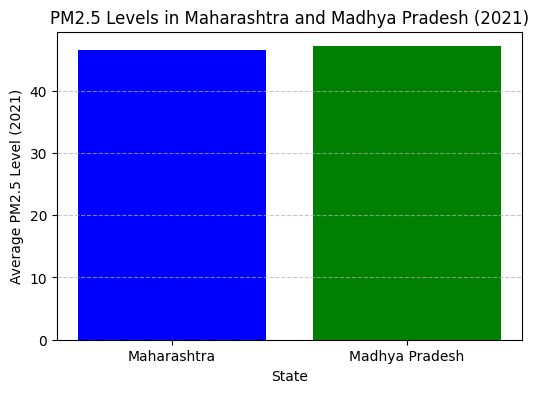

            State  Population Density
1     Maharashtra          365.192023
4  Madhya Pradesh          235.608557
Avg PM2.5 in Maharashtra: 46.44004417107665
Avg PM2.5 in Madhya Pradesh: 47.095951831498965


In [23]:


df11 = dfm.copy()


df_state = pd.read_csv("State_data.csv")


df_2021 = df11[df11['Timestamp'].str.startswith('2021')]

avg_pm25_maharashtra = df_2021[df_2021['state'] == 'Maharashtra']['PM2.5'].mean()
avg_pm25_mp = df_2021[df_2021['state'] == 'Madhya Pradesh']['PM2.5'].mean()


info_state = df_state[df_state['State'].isin(['Maharashtra', 'Madhya Pradesh'])].copy()

info_state['Population Density'] = info_state['Population'] / info_state['Area (km2)']


plt.figure(figsize=(6, 4))
plt.bar(['Maharashtra', 'Madhya Pradesh'], [avg_pm25_maharashtra, avg_pm25_mp], color=['blue', 'green'])


plt.xlabel('State')
plt.ylabel('Average PM2.5 Level (2021)')
plt.title('PM2.5 Levels in Maharashtra and Madhya Pradesh (2021)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print(info_state[['State', 'Population Density']])
print(f"Avg PM2.5 in Maharashtra: {avg_pm25_maharashtra}")
print(f"Avg PM2.5 in Madhya Pradesh: {avg_pm25_mp}")


Miscallaneous

In [ ]:
#1

df12 = dfm.copy()

df12['Timestamp'] = pd.to_datetime(df12['Timestamp'], errors='coerce')

df_2023 = df12[df12['Timestamp'].dt.year == 2023]

city_avg_pm25 = df_2023.groupby('city')['PM2.5'].mean()

most_polluted_city = city_avg_pm25.idxmax()
most_polluted_avg = city_avg_pm25.max()

df_city = df_2023[df_2023['city'] == most_polluted_city]

total_days = df_city['Timestamp'].dt.date.nunique()
hazardous_days = df_city[df_city['PM2.5'] > 300]['Timestamp'].dt.date.nunique()

hazardous_percentage = (hazardous_days / total_days) * 100

print(f"Most Polluted City in 2023: {most_polluted_city} (Avg PM2.5: {most_polluted_avg:.2f} µg/m³)")
print(f"Percentage of days with hazardous PM2.5 levels (>300 µg/m³): {hazardous_percentage:.2f}%")



Most Polluted City in 2023: Darbhanga (Avg PM2.5: 242.92 µg/m³)
Percentage of days with hazardous PM2.5 levels (>300 µg/m³): 0.82%


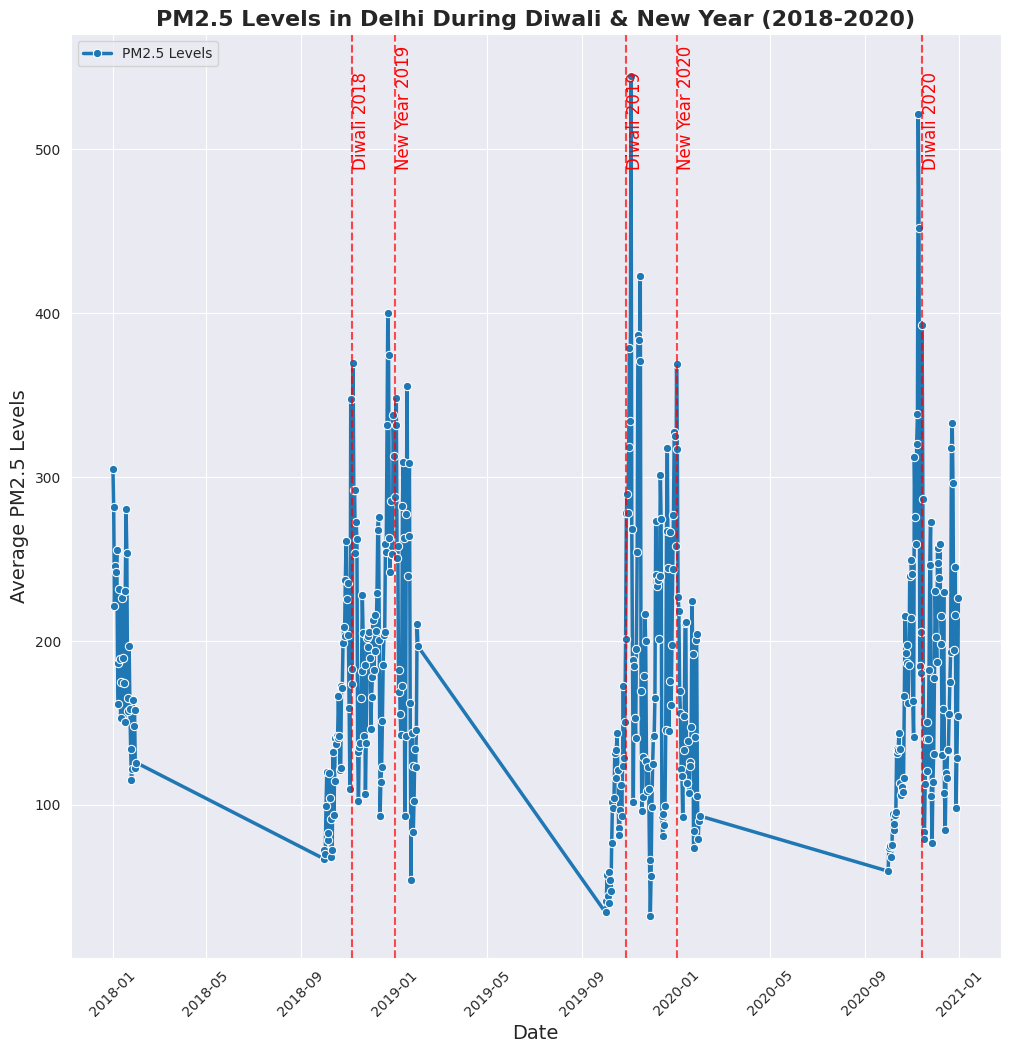

In [38]:
#2

df13 = dfm.copy()
df13['Timestamp'] = pd.to_datetime(df13['Timestamp'], errors='coerce')

df13['Year'] = df13['Timestamp'].dt.year
df13['Month'] = df13['Timestamp'].dt.month

delhi_data = df13[(df13['city'] == 'Delhi') & (df13['Year'].between(2018, 2020))]

festival_months = [10, 11, 12, 1]
delhi_festival_data = delhi_data[delhi_data['Month'].isin(festival_months)]

daily_avg_pm25 = delhi_festival_data.groupby(df13['Timestamp'].dt.date)['PM2.5'].mean()

sns.set_style("darkgrid")
plt.figure(figsize=(12,12))

dates = pd.to_datetime(daily_avg_pm25.index)
sns.lineplot(x=dates, y=daily_avg_pm25.values, marker='o', label='PM2.5 Levels', linewidth=2.5)

festival_dates = {
    'Diwali 2018': '2018-11-07',
    'Diwali 2019': '2019-10-27',
    'Diwali 2020': '2020-11-14',
    'New Year 2019': '2019-01-01',
    'New Year 2020': '2020-01-01'
}

for label, date in festival_dates.items():
    plt.axvline(pd.Timestamp(date), color='red', linestyle='dashed', alpha=0.7)
    plt.text(pd.Timestamp(date), daily_avg_pm25.max()*0.9, label, rotation=90, color='red', fontsize=12)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Average PM2.5 Levels", fontsize=14)
plt.title("PM2.5 Levels in Delhi During Diwali & New Year (2018-2020)", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The highest funded state in the year 2020 is:  Andhra Pradesh


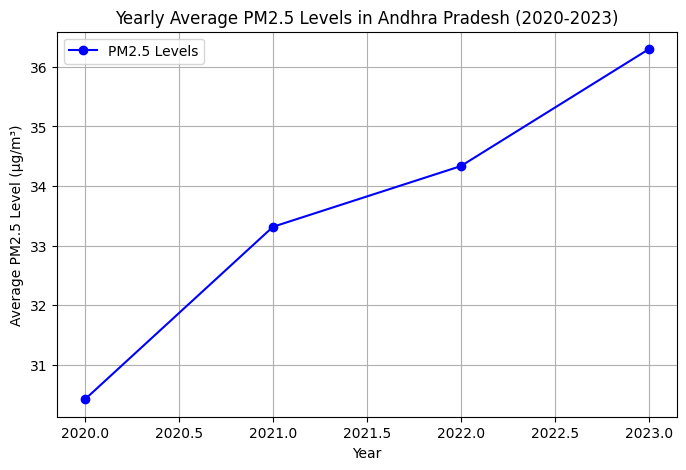

In [26]:

fundin_ncap = pd.read_csv("/content/NCAP_Funding.csv")


fundin_ncap["Amount released during FY 2020-21"] = pd.to_numeric(
    fundin_ncap["Amount released during FY 2020-21"], errors="coerce"
)


state_funding_2020 = fundin_ncap.groupby("State")["Amount released during FY 2020-21"].sum()
highest_funded_state = state_funding_2020.idxmax()
print("The highest funded state in the year 2020 is: ", highest_funded_state)


df20 = dfm.copy()


df20["Timestamp"] = pd.to_datetime(df20["Timestamp"], errors="coerce")


state_df20 = df20[df20["state"] == highest_funded_state].copy()


state_df20["Year"] = state_df20["Timestamp"].dt.year


state_df20_filtered = state_df20[state_df20["Year"].between(2020, 2023)]


yearly_pm25 = state_df20_filtered.groupby("Year")["PM2.5"].mean()

plt.figure(figsize=(8, 5))
plt.plot(yearly_pm25.index, yearly_pm25.values, marker='o', linestyle='-', color='b', label="PM2.5 Levels")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.title(f"Yearly Average PM2.5 Levels in {highest_funded_state} (2020-2023)")
plt.grid(True)
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


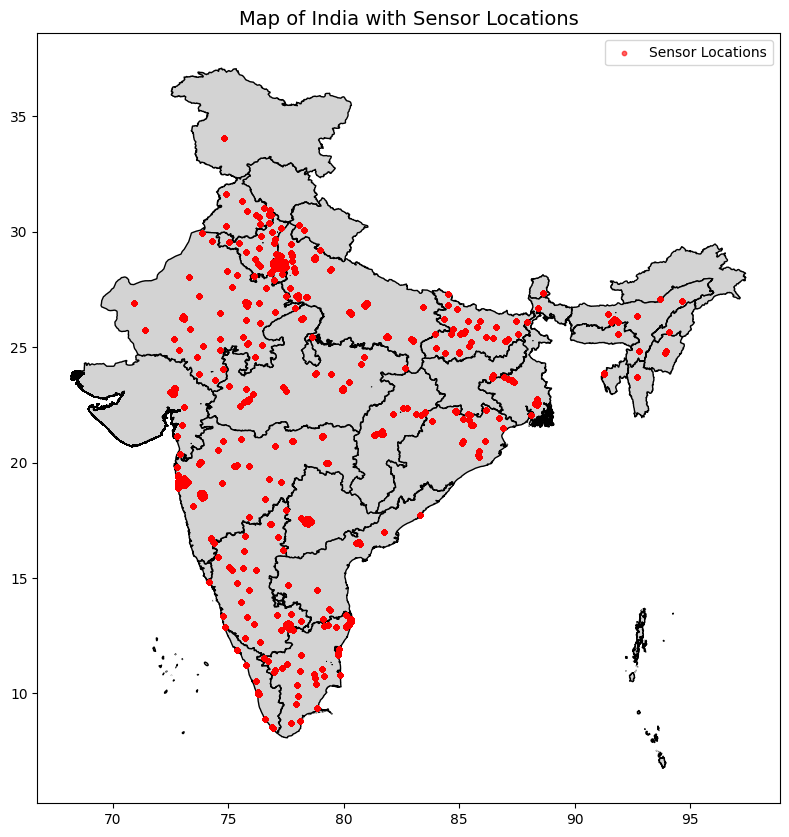

In [ ]:
#4
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


india_map = gpd.read_file("/content/states_india.geojson")

df19 = dfm.copy()


sensor_gdf = gpd.GeoDataFrame(df19, geometry=gpd.points_from_xy(df19['longitude'], df19['latitude']))


fig, ax = plt.subplots(figsize=(10, 10))
india_map.plot(ax=ax, color="lightgrey", edgecolor="black")
sensor_gdf.plot(ax=ax, markersize=10, color='red', label='Sensor Locations', alpha=0.6)
ax.set_title("Map of India with Sensor Locations", fontsize=14)
ax.legend()
plt.show()

